In [1]:
import numpy as np
import skimage
import utils
import pathlib
import matplotlib.pyplot as plt

In [2]:
def P(k, flat_im):
    return np.sum(flat_im <= k)/flat_im.size

def m(k, flat_im):
    cum_mean = 0
    for i in range(k + 1):
        p_i = np.sum(flat_im == i)/flat_im.size
        cum_mean += i*p_i
    return cum_mean
    
def variance(k, flat_im):
    m_G = m(np.amax(flat_im), flat_im)
    P_k = P(k, flat_im)
    return ((m_G * P_k - m(k, flat_im))**2)/(P_k*(1-P_k))

In [3]:
def otsu_thresholding(im: np.ndarray) -> int:
    """
        Otsu's thresholding algorithm that segments an image into 1 or 0 (True or False)
        The function takes in a grayscale image and outputs a boolean image

        args:
            im: np.ndarray of shape (H, W) in the range [0, 255] (dtype=np.uint8)
        return:
            (int) the computed thresholding value
    """
    assert im.dtype == np.uint8
    ### START YOUR CODE HERE ### (You can change anything inside this block) 
    
    flat_im = im.flatten()
    flat_im.sort()
    k_arr = np.unique(flat_im)
    
    """
    _ = plt.hist(flat_im, bins='auto')  # arguments are passed to np.histogram
    plt.title("Histogram")
    plt.show()
    """;
    
    threshold = None
    max_var = -float("inf")
    for k in k_arr:
        var = variance(k, flat_im)
        if var > max_var:
            max_var = var
            threshold = k

    # You can also define other helper functions
    # Compute normalized histogram
    return threshold
    ### END YOUR CODE HERE ###

Reading image: images\thumbprint.png


C:\Users\Erik\anaconda3\envs\ip_env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Found optimal threshold: 153
Saving image to: image_processed\thumbprint-segmented.png


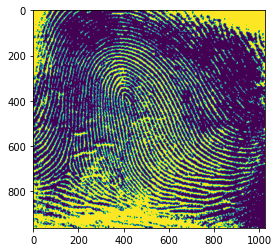

Reading image: images\polymercell.png
Found optimal threshold: 181
Saving image to: image_processed\polymercell-segmented.png


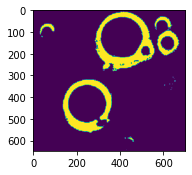

In [4]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impaths_to_segment = [
        pathlib.Path("thumbprint.png"),
        pathlib.Path("polymercell.png")
    ]
    
    plt.figure(figsize=(20, 4))
    for i, impath in enumerate(impaths_to_segment):
        im = utils.read_image(impath)
        threshold = otsu_thresholding(im)
        print("Found optimal threshold:", threshold)

        # Segment the image by threshold
        segmented_image = (im >= threshold)
        assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
                im.shape, segmented_image.shape)
        assert segmented_image.dtype == np.bool, "Expected thresholded image dtype to be np.bool. Was: {}".format(
                segmented_image.dtype)

        segmented_image = utils.to_uint8(segmented_image)
        
        plt.subplot(1, 2, i+1) 
        plt.imshow(segmented_image)

        save_path = "{}-segmented.png".format(impath.stem)
        utils.save_im(save_path, segmented_image)